In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 

In [2]:
file = pd.read_csv('E:\\BAIUST\\Thesis Paper Documents\\Thesis Work\\FinalDataset.csv')

In [3]:
file

,Rainfall,Humidity,Cloud,Dry_bulb,Min_Temp,Max_Temp,Pressure,Sun Shine,Wind_Speed,Wind_Direction
0,0,69,0,19.2,9.9,26.0,1015.2,6.3,0.0,0
1,0,70,0,15.5,11.5,24.0,1015.2,8.3,0.0,0
2,0,71,0,14.2,6.0,23.5,1016.1,8.5,0.0,0
3,0,72,0,15.0,6.4,25.0,1016.8,8.7,0.0,0
4,0,75,0,16.1,7.0,25.5,1018.0,8.8,6.0,7
...,...,...,...,...,...,...,...,...,...,...
9492,0,72,0,18.3,11.5,25.6,1012.9,8.1,0.0,0
9493,0,81,0,17.5,11.0,26.0,1012.9,7.4,2.0,7
9494,0,78,0,17.6,10.5,25.5,1013.7,8.1,2.0,8
9495,0,77,0,17.4,10.9,25.5,1014.2,8.6,0.0,0


In [4]:
X = file[['Humidity','Cloud','Dry_bulb','Min_Temp','Max_Temp','Pressure','Sun Shine','Wind_Speed','Wind_Direction']]
Y = file['Rainfall']

In [5]:
import sklearn

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [20]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
verbose=0, warm_start=False)

RandomForestClassifier(max_features='auto', n_estimators=10)

In [21]:
Y_pred=rf.predict(X_test)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: 

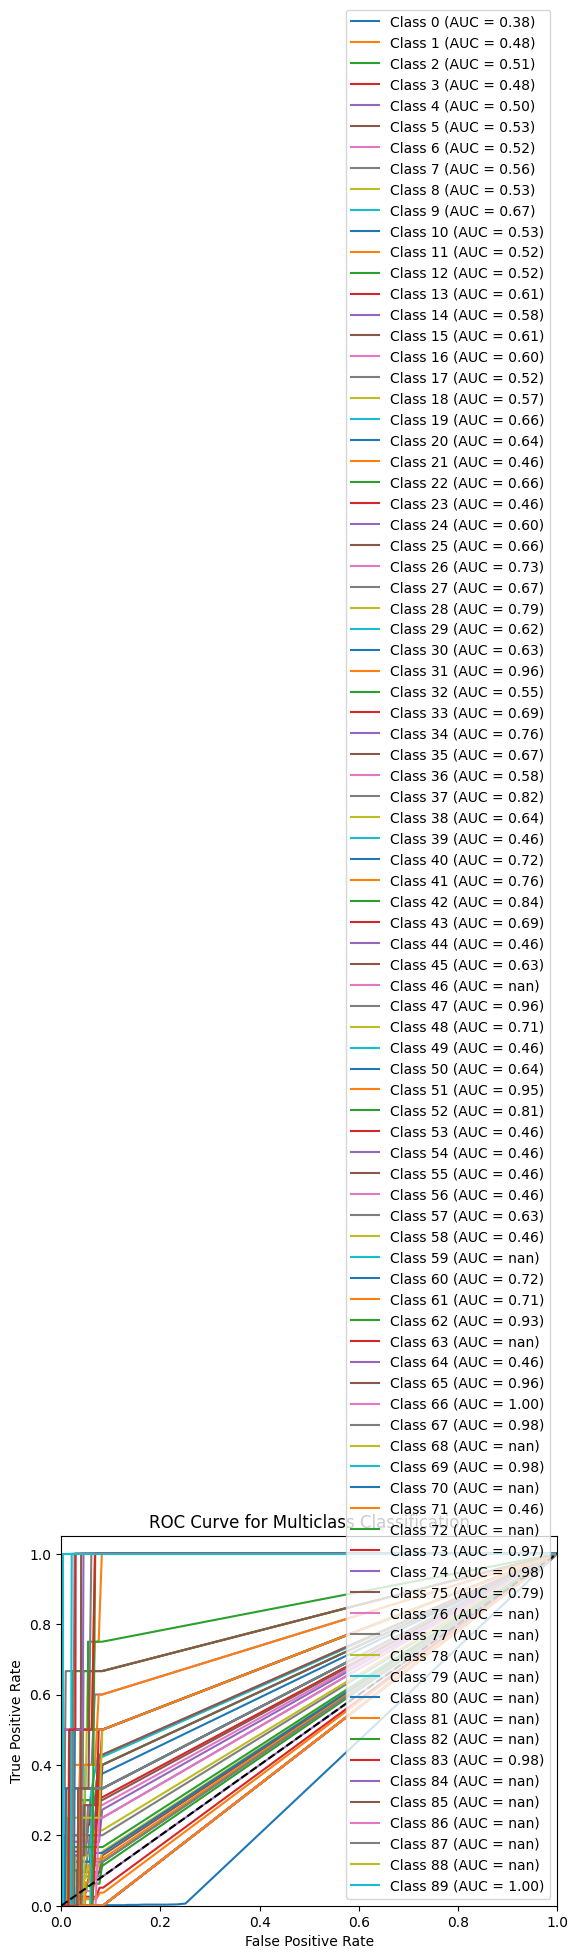

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
n_classes = len(np.unique(Y_test))  
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test, Y_pred, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()